In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder

In [0]:
profile = pd.read_json('data/profile.json', orient='records', lines=True)
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
transcript= pd.read_json('data/transcript.json', orient='records', lines=True)

In [0]:
def get_bar_plots(df, plot_cols, grid_col, layout=221):
  fig = plt.figure(figsize = (18,14))
  
  for i in range(len(plot_cols)):
    ax = sns.barplot(x=grid_col, y = plot_cols[i], data = df, ax = plt.subplot(layout+i))
    plt.ylabel(plot_cols[i])
    plt.xlabel(grid_col)
  return 'Done'

def get_box_plots(df, plot_cols, grid_col, layout=221):
  fig = plt.figure(figsize = (18,14))
  for i in range(len(plot_cols)):
    ax = sns.boxplot(x=grid_col, y = plot_cols[i], data = df, ax = plt.subplot(layout+i))
    plt.ylabel(plot_cols[i])
    plt.xlabel(grid_col)
  return 'Done'

def get_violin_plots(df, plot_cols, grid_col, layout=221):
  fig = plt.figure(figsize = (18,14))
    
  for i in range(len(plot_cols)):
    ax = sns.violinplot(y=grid_col, x = plot_cols[i], data = df, inner =None, scale ='area', ax = plt.subplot(layout+i))
    plt.xlabel(plot_cols[i])
    plt.ylabel(grid_col)
  return 'Done'

In [0]:
profile.head(5)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [0]:
profile.shape

(17000, 5)

In [0]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
age                   14825 non-null float64
gender                14825 non-null object
person_id             17000 non-null object
income                14825 non-null float64
became_member_year    17000 non-null int64
days_as_member        17000 non-null int64
age_bins              14825 non-null category
income_bins           14825 non-null category
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 830.9+ KB


In [0]:
profile[['age','income', 'days_as_member']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.0,55.0,66.0,101.0
income,14825.0,65404.991568,21598.299410,30000.0,49000.0,64000.0,80000.0,120000.0
days_as_member,17000.0,517.449882,411.223904,0.0,208.0,358.0,791.0,1823.0


In [0]:
profile[profile.age <118][['age','income']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,14825.0,54.393524,17.383705,18.0,42.0,55.0,66.0,101.0
income,14825.0,65404.991568,21598.299410,30000.0,49000.0,64000.0,80000.0,120000.0


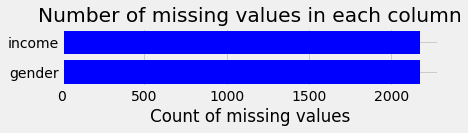

In [0]:
#Explore Missing Values
missing_df = profile.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(6,1))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [0]:
#percentage of missing values
missing_df['missing_ratio'] = missing_df['missing_count'] / profile.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.001]

,column_name,missing_count,missing_ratio
2,gender,2175,0.127941
4,income,2175,0.127941


In [0]:
print('Number of customers aged 118 :', profile[profile.age ==118].age.count())

#Replace 118 with NaN

profile['age'] = profile.age.apply(lambda x: np.nan if x==118 else x)

Number of customers aged 118 : 2175


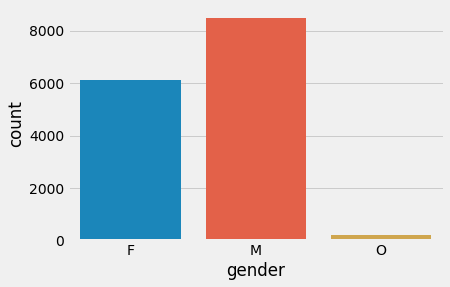

In [0]:
sns.countplot(data = profile, x = 'gender')

Text(0, 0.5, 'Count')

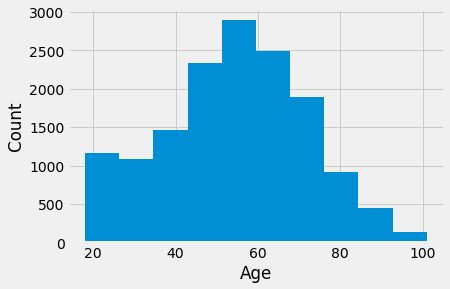

In [0]:
profile.age.plot.hist(bins =10)
plt.xlabel('Age')
plt.ylabel('Count')

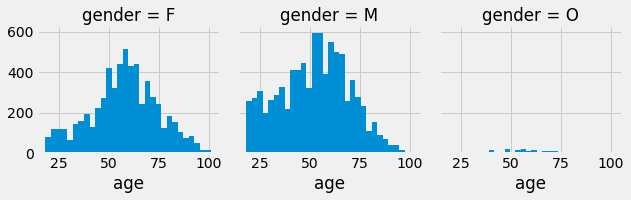

In [0]:
g = sns.FacetGrid(profile, col="gender") 
g.map(plt.hist, "age", bins =30)

Text(0, 0.5, 'Count')

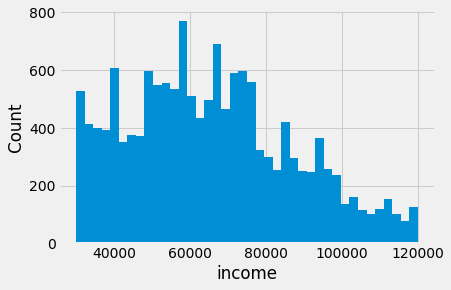

In [0]:
profile.income.plot.hist(bins =40)
plt.xlabel('income')
plt.ylabel('Count')

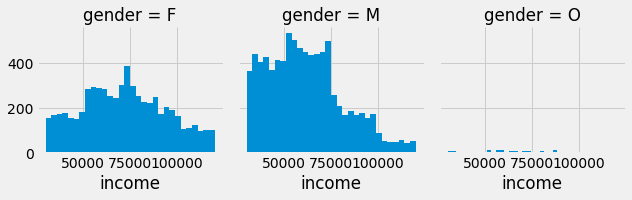

In [0]:
g = sns.FacetGrid(profile, col="gender") 
g.map(plt.hist, "income", bins =30)

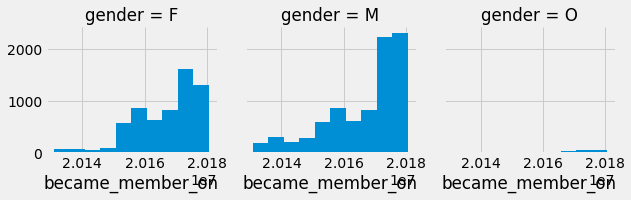

In [0]:
g = sns.FacetGrid(profile, col="gender") 
g.map(plt.hist, "became_member_on")

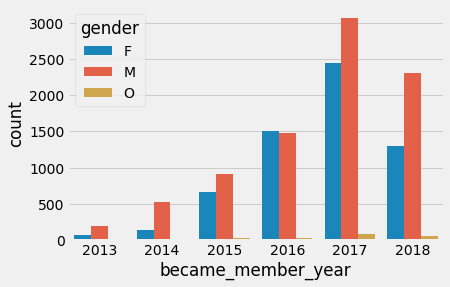

In [0]:
profile['became_member_year'] = profile.became_member_on.apply(lambda x: round(x/10000))
sns.countplot(x='became_member_year', hue = 'gender', data = profile)

In [0]:
profile['became_member_on'] = profile['became_member_on'].astype(str).astype('datetime64[ns]', format = "%Y%m%d")
print('data type of became member on:', profile['became_member_on'].dtype)
print('max date :', profile['became_member_on'].max(), 'min date:' ,profile['became_member_on'].min())
max_date = profile['became_member_on'].max()
profile['days_as_member'] = profile['became_member_on'].apply(lambda x: (max_date - x).days)
profile.drop('became_member_on', axis=1, inplace=True)

data type of became member on: datetime64[ns]
max date : 2018-07-26 00:00:00 min date: 2013-07-29 00:00:00


'Done'

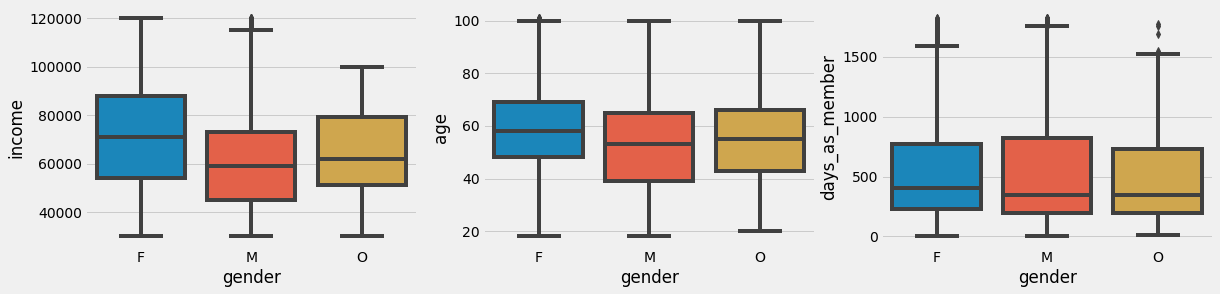

In [0]:
cols = ['income','age', 'days_as_member']
get_box_plots(profile, cols, 'gender', layout =331)

'Done'

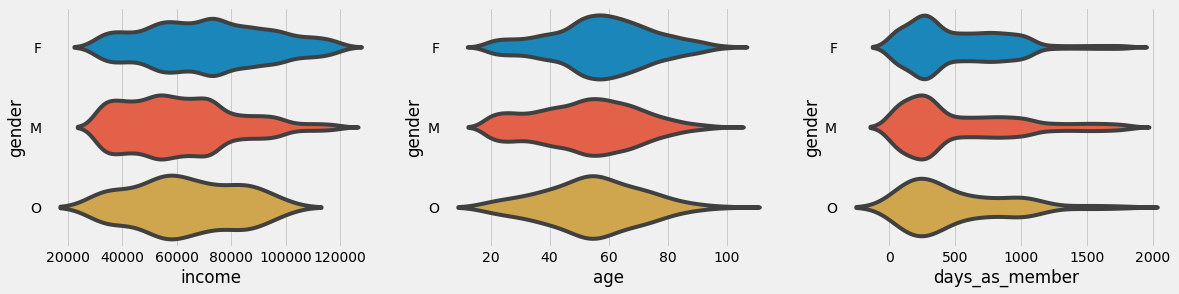

In [0]:
get_violin_plots(profile, cols, 'gender', layout =331)

Text(0.5, 1.0, 'Member distribution across Age Groups ')

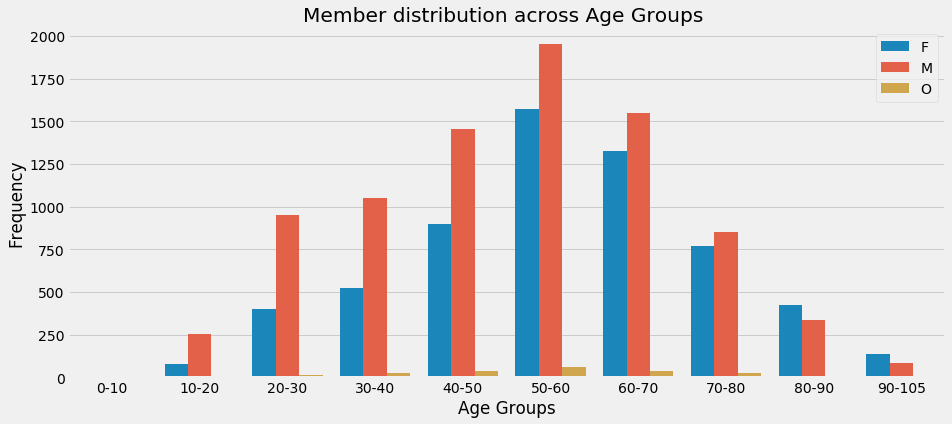

In [0]:
# capture Age into 10 bins to understand the distribution
bins = [0,10,20,30,40,50,60,70,80,90,105]
profile['age_bins'] = pd.cut(profile['age'],bins, labels = ['0-10','10-20','20-30','30-40','40-50', '50-60','60-70', '70-80', '80-90', '90-105'],include_lowest=True)
fig = plt.figure(figsize=(14, 6))
fig.clf()
ax = fig.gca()
sns.countplot(x='age_bins', hue = 'gender', data = profile)
ax.legend(loc='upper right')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age Groups')
ax.set_title('Member distribution across Age Groups ')



Text(0.5, 1.0, 'Member income distribution across income groups ')

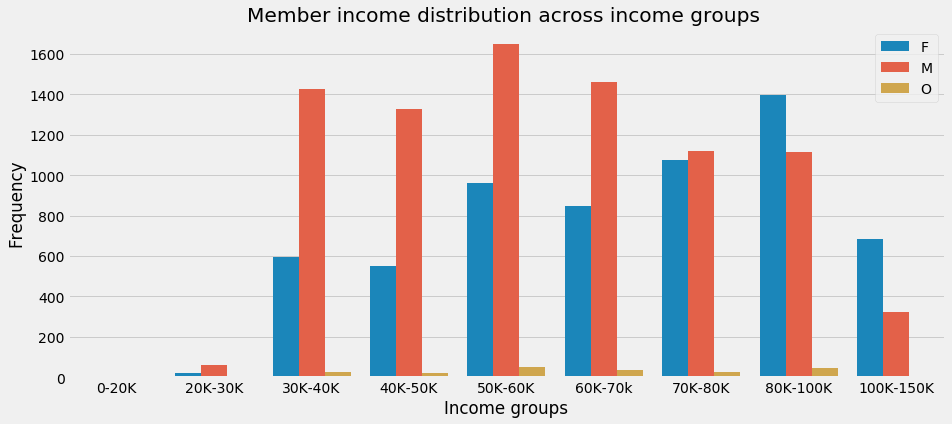

In [0]:


# capture income into 10 bins to understand the distribution
bins = [0,20000,30000,40000,50000,60000,70000,80000,100000,150000]
profile['income_bins'] = pd.cut(profile['income'],bins, labels = ['0-20K','20K-30K', '30K-40K','40K-50K','50K-60K','60K-70k', '70K-80K','80K-100K', '100K-150K' ],include_lowest=True)
fig = plt.figure(figsize=(14, 6))
fig.clf()
ax = fig.gca()
sns.countplot(x='income_bins', hue = 'gender', data = profile)
ax.legend(loc='upper right')
ax.set_ylabel('Frequency')
ax.set_xlabel('Income groups')
ax.set_title('Member income distribution across income groups ')

In [0]:
portfolio.sort_values('offer_type').head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0


In [0]:
#function for cleaning portfolio


def one_hot_channels(portfolio_df):
    #one hot encoded channels columns
    channels = ['web', 'email', 'mobile', 'social']

    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x)*1

    #drop channels column
    portfolio_df = portfolio_df.drop('channels', axis=1)
    
    return portfolio_df

def portfolio_preprocessing(portfolio_df):
   
    # one_hot_channels
    portfolio_df = one_hot_channels(portfolio_df)
    
    # Add new features 
    portfolio_df['duration_hours'] = portfolio_df['duration']*24
    portfolio_df['relative_difficulty'] = portfolio_df['difficulty']/portfolio_df['duration']
    portfolio_df['reward_to_difficulty'] = portfolio_df['reward']/portfolio_df['difficulty']
    
    return portfolio_df

In [0]:
portfolio = portfolio_preprocessing(portfolio)

In [0]:
portfolio.sort_values('offer_type').head(10)

,difficulty,duration,id,offer_type,reward,web,email,mobile,social,duration_hours,relative_difficulty,reward_to_difficulty
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1,168,1.428571,1.000000
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,120,2.000000,1.000000
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0,168,0.714286,1.000000
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,120,1.000000,1.000000
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0,240,2.000000,0.250000
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,168,1.000000,0.428571
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,240,1.000000,0.200000
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0,168,1.428571,0.200000
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0,96,0.000000,NaN
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1,72,0.000000,NaN


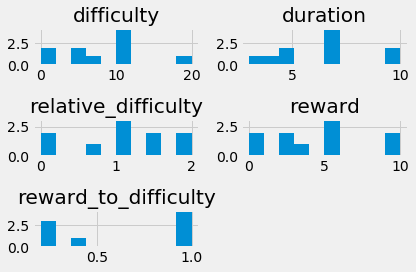

In [0]:
portfolio[['difficulty', 'reward', 'duration', 'relative_difficulty', 'reward_to_difficulty']].hist();
plt.tight_layout()

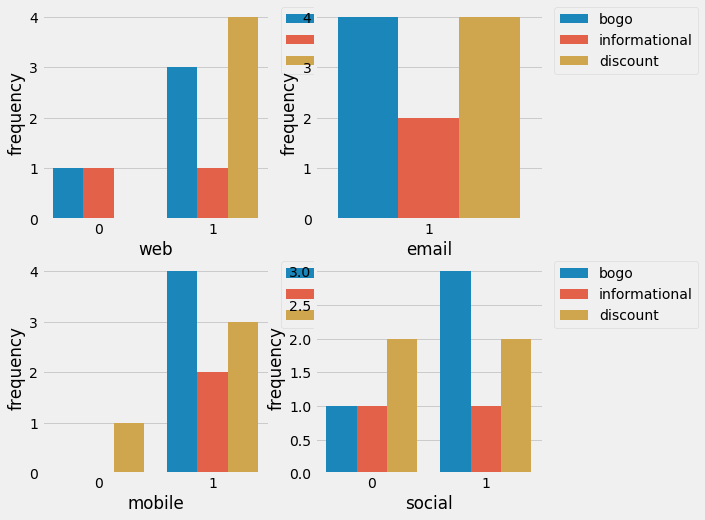

In [0]:
fig = plt.figure(figsize = (8,8))
channels = ['web','email', 'mobile', 'social']
for i in range(4):
    ax = sns.countplot(x=channels[i], hue = 'offer_type', data = portfolio, ax = plt.subplot(221+i))
    #ax.legend(loc='upper left')
    plt.xlabel(channels[i])
    plt.ylabel('frequency')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [0]:
transcript.head(5)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [0]:
transcript.tail(5)

,event,person,time,value
306529,transaction,b3a1272bc9904337b331bf348c3e8c17,714,{'amount': 1.5899999999999999}
306530,transaction,68213b08d99a4ae1b0dcb72aebd9aa35,714,{'amount': 9.53}
306531,transaction,a00058cf10334a308c68e7631c529907,714,{'amount': 3.61}
306532,transaction,76ddbd6576844afe811f1a3c0fbb5bec,714,{'amount': 3.5300000000000002}
306533,transaction,c02b10e8752c4d8e9b73f918558531f7,714,{'amount': 4.05}


In [0]:
transcript.shape

(306534, 4)

In [0]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


'Done'

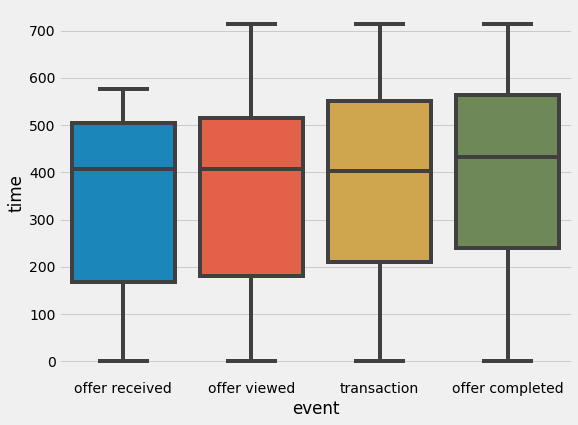

In [0]:
get_box_plots(transcript, ['time'], 'event')

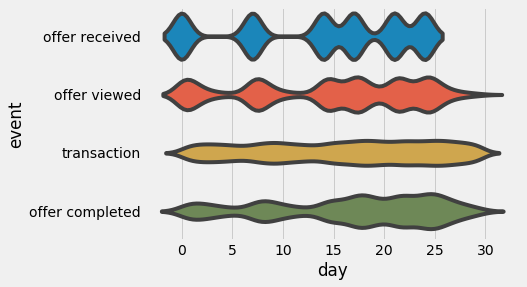

In [0]:
transcript['day'] = transcript['time']/24
sns.violinplot(x="day", y="event", data=transcript, inner = None)

Text(0, 0.5, 'Count')

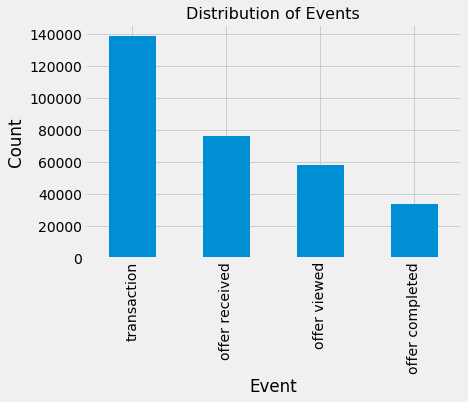

In [0]:
transcript.event.value_counts().plot(kind='bar')
plt.title("Distribution of Events", fontsize=16)
plt.xlabel('Event')
plt.ylabel('Count')

In [0]:

# determine whether row deals with offer or transcation
transcript['value_type'] = transcript['value'].apply(lambda x : list(x.keys())[0])

# extract offer id if its an id, or transcation amount if it is a transcation
transcript['actual_value'] = transcript['value'].apply(lambda x : list(x.values())[0])

Text(0, 0.5, 'Count')

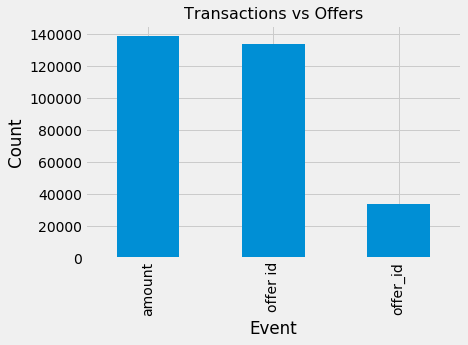

In [0]:
transcript.value_type.value_counts().plot(kind='bar')
plt.title("Transactions vs Offers", fontsize=16)
plt.xlabel('Event')
plt.ylabel('Count')

In [0]:
transcript['value_type'] =transcript.value_type.apply(lambda x: 'offer_id' if x== 'offer id' else x)

Text(0, 0.5, 'Count')

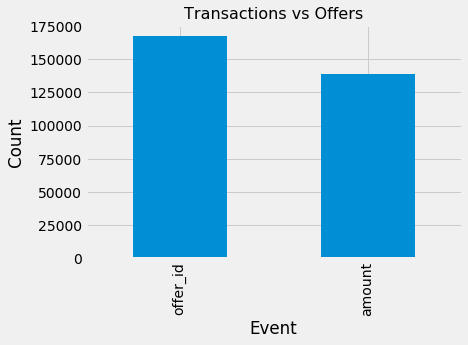

In [0]:
transcript.value_type.value_counts().plot(kind='bar')
plt.title("Transactions vs Offers", fontsize=16)
plt.xlabel('Event')
plt.ylabel('Count')

In [0]:
transcript[transcript.event == 'transaction'].head(5)

,event,person,time,value,day,value_type,actual_value
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001},0.0,amount,0.83
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'amount': 34.56},0.0,amount,34.56
12659,transaction,54890f68699049c2a04d415abc25e717,0,{'amount': 13.23},0.0,amount,13.23
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0,{'amount': 19.51},0.0,amount,19.51
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0,{'amount': 18.97},0.0,amount,18.97


In [0]:
#transcript.drop(['value'], axis =1, inplace=True)
transcript_transaction = transcript[transcript.value_type == 'amount']
transcript_transaction.drop(['value_type'], axis =1, inplace=True)
transcript_offer =transcript[transcript.value_type =='offer_id']
transcript_offer.drop(['value_type'], axis =1, inplace=True)


In [0]:
transcript_offer.describe().T

,count,mean,std,min,25%,50%,75%,max
time,167581.0,353.778412,198.301287,0.0,168.0,408.0,510.00,714.00
day,167581.0,14.740767,8.262554,0.0,7.0,17.0,21.25,29.75


In [0]:
transcript_offer.groupby('event').describe()

time                               ...   day                   
                   count        mean         std  min  ...   25%   50%   75%    max
event                                                  ...                         
offer completed  33579.0  401.052801  192.352614  0.0  ...  10.0  18.0  23.5  29.75
offer received   76277.0  332.579519  196.489548  0.0  ...   7.0  17.0  21.0  24.00
offer viewed     57725.0  354.290515  199.317684  0.0  ...   7.5  17.0  21.5  29.75

[3 rows x 16 columns]

In [0]:
print( 'offer_recieved times:' , transcript[transcript.event == 'offer received'].time.unique())
print( 'offer_recieved times:' , transcript[transcript.event == 'offer received'].day.unique())

offer_recieved times: [  0 168 336 408 504 576]
offer_recieved times: [ 0.  7. 14. 17. 21. 24.]


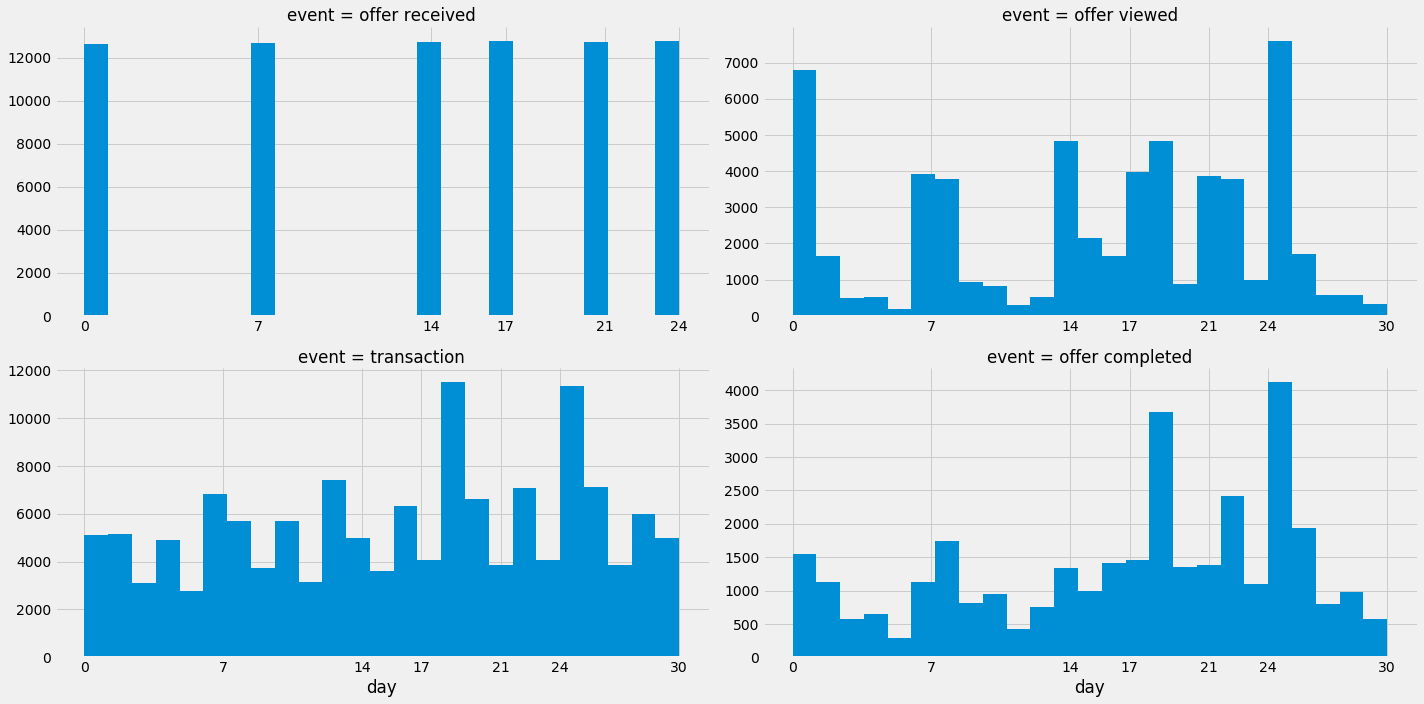

In [0]:

ax= sns.FacetGrid(transcript, col="event", col_wrap =2, sharex =False, sharey=False, height=5, aspect=2 ).set(xticks= [0,7,14,17,21,24,30]) 
ax.map(plt.hist, "day", bins =25)
#ax.fig(figsize = (12,6))

In [0]:
def transcript_preprocessing(transcript_df):
    values_df = pd.DataFrame(transcript_df.value.tolist())
    values_df.offer_id.update(values_df['offer id'])
    values_df = values_df.drop('offer id', axis=1)
    return transcript_df.join(values_df).drop('value', axis=1)

In [0]:
transcript_df = transcript_preprocessing(transcript)

In [0]:
def merge_all(profile, portfolio, transcript):
    merged_df = transcript.merge(profile, left_on='person', right_on='id').drop('id', axis=1)
    merged_df = merged_df.merge(
        portfolio.rename(columns={'reward': 'reward_t'}),
        left_on='offer_id', right_on='id', how ='left').drop('id', axis=1)
    return merged_df

In [0]:
merged_df = merge_all(profile, portfolio, transcript_df)

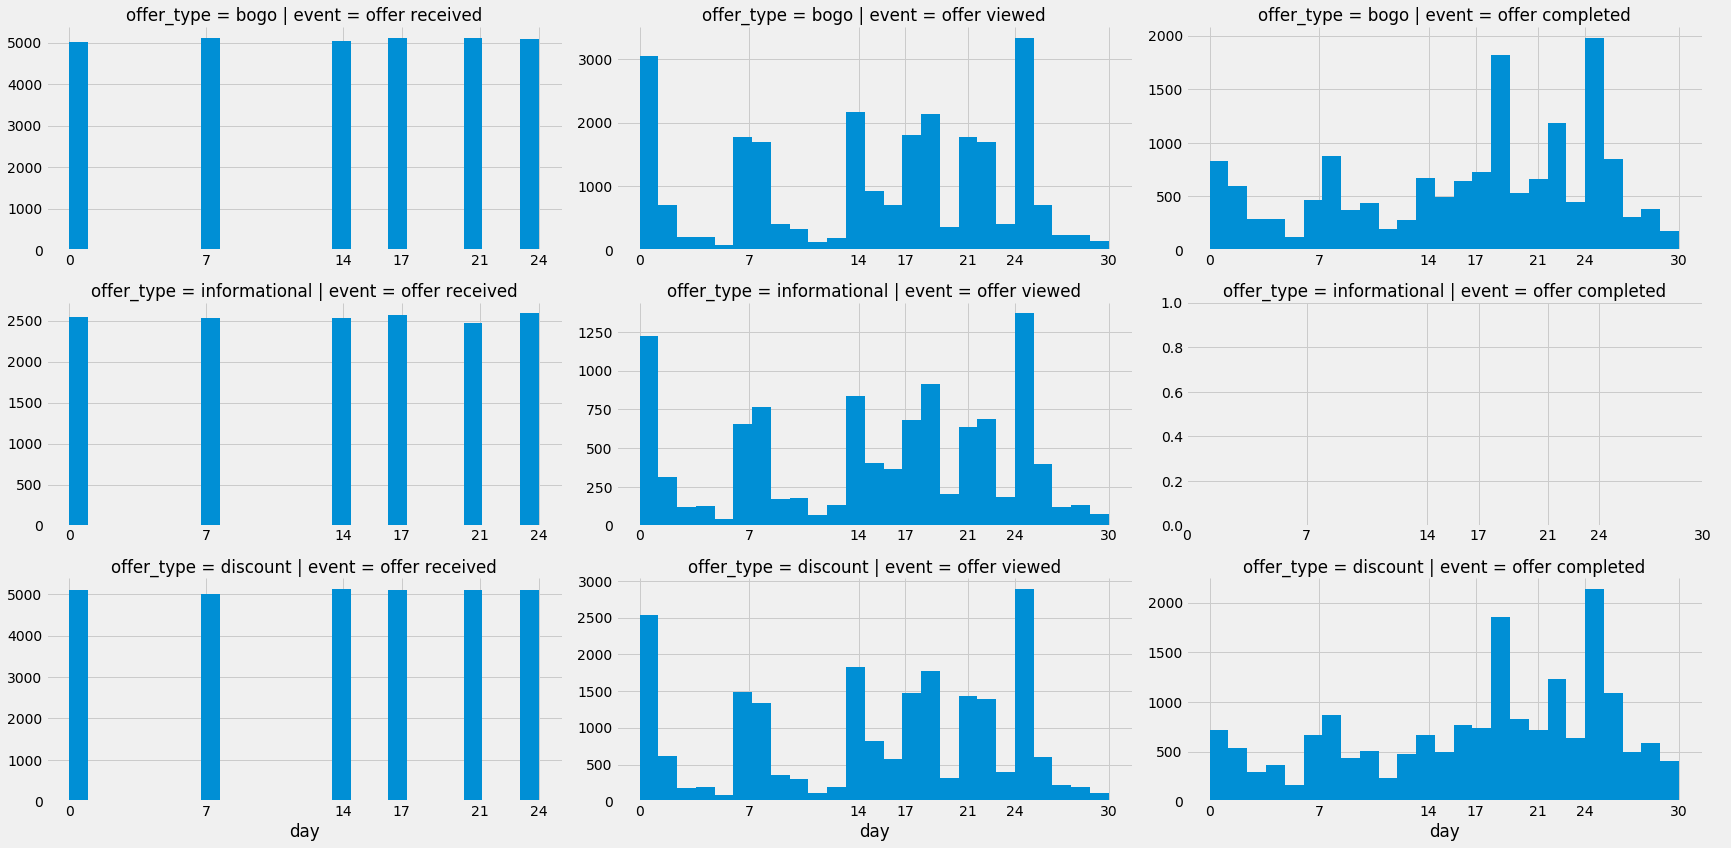

In [0]:
ax= sns.FacetGrid(merged_df[merged_df.event != 'transaction'], col="event", row ='offer_type',sharex =False, sharey=False, height=4, aspect=2 ).set(xticks= [0,7,14,17,21,24,30]) 
ax = (ax.map(plt.hist, "day", bins =25).add_legend())
#ax.fig(figsize = (12,6))

In [0]:
merged_df[(merged_df.event == 'offer viewed')][['offer_type', 'event' ]].groupby([ 'offer_type']).count()

,event
offer_type,
bogo,25449
discount,21445
informational,10831


In [0]:
merged_df[(merged_df.event == 'offer completed')][['offer_type', 'event' ]].groupby([ 'offer_type']).count()

,event
offer_type,
bogo,15669
discount,17910


In [0]:
merged_df[(merged_df.event == 'offer completed')][['offer_id', 'offer_type', 'event']].groupby(['offer_id', 'offer_type']).count()

,,event
offer_id,offer_type,
0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,3420
2298d6c36e964ae4a3e7e9706d1fb8c2,discount,5156
2906b810c7d4411798c6938adc9daaa5,discount,4017
4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,3331
9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,4354
ae264e3637204a6fb9bb56bc8210ddfd,bogo,3688
f19421c1d4aa40978ebb69ca19b0e20d,bogo,4296
fafdcd668e3743c1bb461111dcafc2a4,discount,5317


In [0]:
portfolio.sort_values('offer_type').head(10)

,difficulty,duration,id,offer_type,reward,web,email,mobile,social,duration_hours,relative_difficulty,reward_to_difficulty
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1,168,1.428571,1.000000
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,120,2.000000,1.000000
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0,168,0.714286,1.000000
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,120,1.000000,1.000000
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0,240,2.000000,0.250000
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,168,1.000000,0.428571
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,240,1.000000,0.200000
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0,168,1.428571,0.200000
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0,96,0.000000,NaN
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1,72,0.000000,NaN


In [0]:
merged_df.tail(5)

,event,person,time,day,value_type,actual_value,amount,offer_id,reward,age,gender,income,became_member_year,days_as_member,age_bins,income_bins,difficulty,duration,offer_type,reward_t,web,email,mobile,social,duration_hours,relative_difficulty,reward_to_difficulty
306529,offer received,912b9f623b9e4b4eb99b6dc919f09a93,576,24.0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,None,NaN,2017,303,NaN,NaN,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,120.0,2.0,1.0
306530,offer viewed,912b9f623b9e4b4eb99b6dc919f09a93,594,25.0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,None,NaN,2017,303,NaN,NaN,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,120.0,2.0,1.0
306531,offer received,3045af4e98794a04a5542d3eac939b1f,576,24.0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,58.0,F,78000.0,2016,644,50-60,70K-80K,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,120.0,2.0,1.0
306532,offer viewed,3045af4e98794a04a5542d3eac939b1f,576,24.0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,58.0,F,78000.0,2016,644,50-60,70K-80K,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,120.0,2.0,1.0
306533,transaction,da7a7c0dcfcb41a8acc7864a53cf60fb,582,24.0,amount,0.35,0.35,NaN,NaN,NaN,None,NaN,2017,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#transcript_transaction['amount'] = transcript_transaction['actual_value'].apply(lambda x: float(x))
transcript_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,306534.0,366.382940,200.326314,0.00,186.00,408.00,528.00,714.00
day,306534.0,15.261883,8.356520,0.00,8.00,17.00,22.00,30.00
amount,138953.0,12.777356,30.250529,0.05,2.78,8.89,18.07,1062.28
reward,33579.0,4.904137,2.886647,2.00,2.00,5.00,5.00,10.00


In [0]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,306534.0,366.382940,200.326314,0.00,186.000000,408.00,528.000000,714.00
day,306534.0,15.261883,8.356520,0.00,8.000000,17.00,22.000000,30.00
amount,138953.0,12.777356,30.250529,0.05,2.780000,8.89,18.070000,1062.28
reward,33579.0,4.904137,2.886647,2.00,2.000000,5.00,5.000000,10.00
age,272762.0,53.840696,17.551337,18.00,41.000000,55.00,66.000000,101.00
income,272762.0,64337.000755,21243.762941,30000.00,48000.000000,62000.00,78000.000000,120000.00
became_member_year,306534.0,2016.476032,1.199589,2013.00,2016.000000,2017.00,2017.000000,2018.00
days_as_member,306534.0,574.943011,421.482784,0.00,242.000000,469.00,856.000000,1823.00
difficulty,167581.0,7.850401,5.048944,0.00,5.000000,10.00,10.000000,20.00
duration,167581.0,6.610737,2.136130,3.00,5.000000,7.00,7.000000,10.00


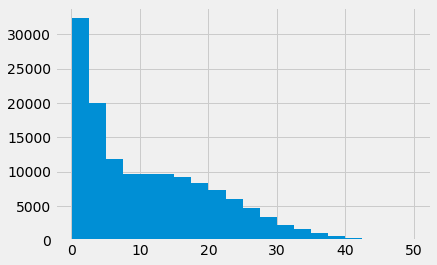

In [0]:
transcript_df[transcript_df.amount<50].amount.hist(bins =20)

In [0]:
merged_transaction = transcript_transaction.merge(profile, on = 'person_id',
                                 how='left')

Text(0.5, 1.0, 'Member transaction distribution across gender ')

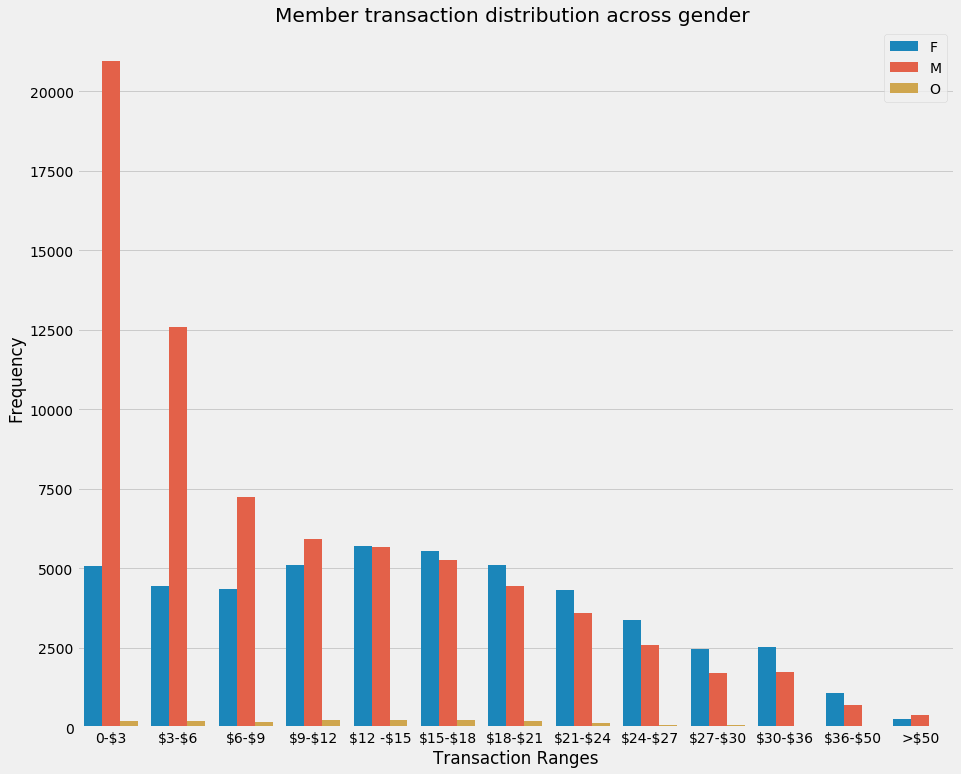

In [0]:
# capture income into 10 bins to understand the distribution
bins = [0,3,6,9,12,15,18,21,24,27,30,36,50,1000]
merged_df['amount_bins'] = pd.cut(merged_df['amount'],bins, labels = ['0-$3','\$3-$6', '\$6-$9','\$9-$12','\$12 -$15', '\$15-$18','\$18-$21', '\$21-$24','\$24-$27','\$27-$30','\$30-$36', '\$36-$50','>$50' ],include_lowest=True)
fig = plt.figure(figsize=(14, 12))
fig.clf()
ax = fig.gca()
sns.countplot(x='amount_bins', hue = 'gender', data = merged_df)
ax.legend(loc='upper right')
ax.set_ylabel('Frequency')
ax.set_xlabel('Transaction Ranges')
ax.set_title('Member transaction distribution across gender ')

In [0]:
transcript_df[transcript_df.person =='78afa995795e4d85b5d9ceeca43f5fef'][[]]

,event,person,time,day,value_type,actual_value,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
15561,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0.0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,6.0,amount,19.89,19.89,NaN,NaN
47583,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,6.0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,6.0,amount,17.78,17.78,NaN,NaN
53176,offer received,78afa995795e4d85b5d9ceeca43f5fef,168,7.0,offer_id,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
85291,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,216,9.0,offer_id,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,9.0,amount,19.67,19.67,NaN,NaN
92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,10.0,amount,29.72,29.72,NaN,NaN
141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,16.0,amount,23.93,23.93,NaN,NaN
